In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import seaborn as sns

In [2]:
TRAIN_PATH = '/home/lucas/codenation/enem-2/train.csv'

In [3]:
TEST_PATH = '/home/lucas/codenation/enem-2/test.csv'

## Carregamento e preparação inicial dos dados

In [4]:
# %precision %.2f
# pd.options.display.float_format = '{:,.2f}'.format

train_enem = pd.read_csv(TRAIN_PATH)
train_enem.drop(labels='Unnamed: 0', axis=1, inplace=True) # índice que veio como coluna no dataset
train_enem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [5]:
test_enem = pd.read_csv(TEST_PATH)
print('Número de colunas: ', test_enem.shape[1])
test_enem.head()

Número de colunas:  47


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


Agora, separamos apenas as colunas disponíveis em ambos datasets simultaneamente. Como o conjunto de dados de treino é mais completo (possui mais colunas), precisamos listar apenas as colunas do conjunto de dados de teste, filtrar os dados de treino por essa lista e adicionar a coluna da nota de matemática.

In [6]:
new_train_columns = test_enem.columns.to_list()
new_train_columns.append('NU_NOTA_MT') # adicionando a coluna de matemática dos dados de treino
train_data = train_enem[new_train_columns].copy()
print('Número de colunas: ', train_data.shape[1])
train_data.head()

Número de colunas:  48


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,...,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,...,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,...,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,...,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,...,NaN,E,D,C,A,A,B,F,A,NaN


## Análise básica dos dados e separação dos que aparentemente mais importam.

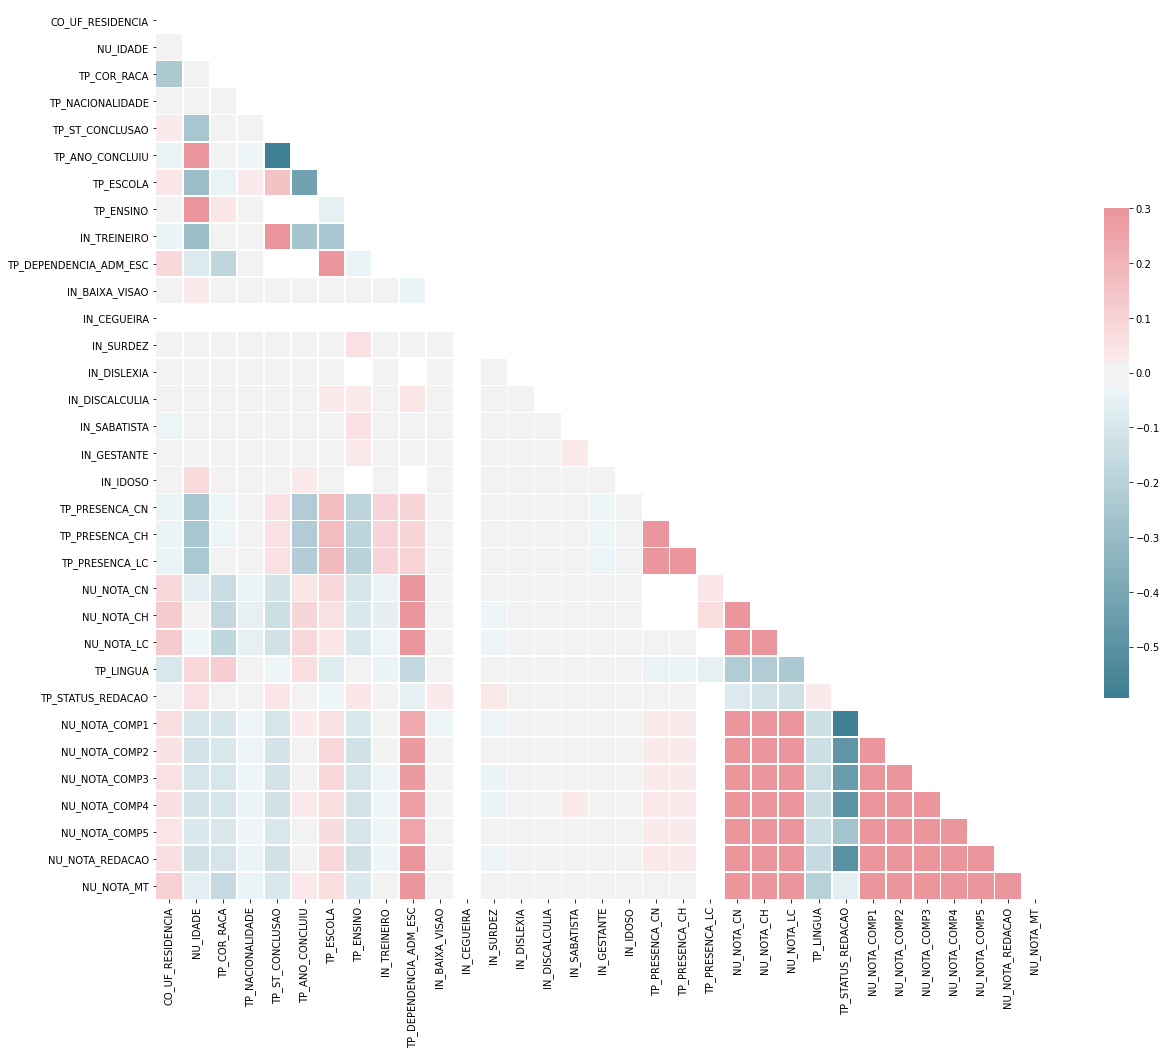

In [8]:
# código de: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Vamos pegar apenas os 10 valores com maior correlação com a nota de matemática, de acordo com a matrix acima os que tem a cor rosa mais forte.

In [9]:
# pegando os 10 maiores valores de correlação referentes ao valor das notas de matemática
train_data[train_data.columns[1:]].corr()['NU_NOTA_MT'].sort_values(ascending=False)[:11]

NU_NOTA_MT                1.000000
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
NU_NOTA_REDACAO           0.379376
TP_DEPENDENCIA_ADM_ESC    0.373233
NU_NOTA_COMP3             0.350307
NU_NOTA_COMP5             0.343337
NU_NOTA_COMP4             0.342282
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP1             0.299402
Name: NU_NOTA_MT, dtype: float64

## Última modificação nos dados, separação do conjunto de treino em treino e validação. Definição dos modelos.

In [10]:
desired_columns = ['NU_NOTA_MT','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO',
                 'TP_DEPENDENCIA_ADM_ESC','NU_NOTA_COMP3','NU_NOTA_COMP5',
                 'NU_NOTA_COMP4','NU_NOTA_COMP2', 'NU_NOTA_COMP1']

# realiza a segunda filtragem, pegando apenas as 10 colunas com maior correlação com a coluna de matemática
train_data = train_data[desired_columns].copy()

train_data.head()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1
0,399.4,436.3,495.4,581.2,520.0,NaN,120.0,80.0,80.0,120.0,120.0
1,459.8,474.5,544.1,599.0,580.0,2.0,120.0,80.0,120.0,120.0,140.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agora trataremos dos dados faltantes. Seguiremos o conselho dado por um dos participantes do fórum do desafio e substituiremos os valores faltates por -1.

In [11]:
train_data.replace(np.nan, -1, inplace=True)
test_enem.replace(np.nan, -1, inplace=True)

Faremos a divisão dos dados que serão entrada e saída do nosso modelo.

In [12]:
x = train_data[desired_columns[1:]]
x.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4,NU_NOTA_COMP2,NU_NOTA_COMP1
0,436.3,495.4,581.2,520.0,-1.0,120.0,80.0,80.0,120.0,120.0
1,474.5,544.1,599.0,580.0,2.0,120.0,80.0,120.0,120.0,140.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
y = train_data['NU_NOTA_MT']
y.head()

0    399.4
1    459.8
2     -1.0
3     -1.0
4     -1.0
Name: NU_NOTA_MT, dtype: float64

Com entrada e saída definidas, agora precisamos dividir os dados entre os que usaremos para treinar nosso modelo e os que usaremos para testá-lo.

In [14]:
# create a unique seed number
np.random.seed(12450) 

# divisão do dataset
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size= 0.90, random_state = 23135)

In [15]:
# definição do modelo
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

In [16]:
# R² score
model.score(x_val, y_val)

0.9031416477649934

In [17]:
# definição do segundo modelo que testaremos
model_2 = RandomForestRegressor()
model_2.fit(x_train, y_train)

RandomForestRegressor()

In [18]:
# R² score
model_2.score(x_val, y_val)

0.9190986545639637

In [19]:
# definição do terceiro modelo que testaremos
model_3 = GradientBoostingRegressor()
model_3.fit(x_train, y_train)

GradientBoostingRegressor()

In [20]:
# R² score
model_3.score(x_val, y_val)

0.9221850552525158

## Treinamento final e montagem da submissão.

Pegando o melhor modelo obtido com os testes acima, faremos o treinamento dele com todo o conjunto de treino e por fim faremos a predição das notas para o conjunto de teste.

In [21]:
model_3.fit(x, y)

GradientBoostingRegressor()

In [22]:
x_test = test_enem[desired_columns[1:]]

In [23]:
predictions_test = model.predict(x_test)

In [24]:
result = pd.DataFrame()
result['NU_INSCRICAO'] = test_enem['NU_INSCRICAO'].copy()
result['NU_NOTA_MT'] = predictions_test
result

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,433.148700
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,482.711288
2,b38a03232f43b11c9d0788abaf060f7366053b6d,550.169382
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-7.076211
4,715494628a50142ce8cb17191cfe6d0f3cae0934,530.180284
...,...,...
4571,dac0f22429c7f8e3931d0abaf5dfc8e5c772a48b,445.975974
4572,a75fa8770257e7c9368d059fe53d9ef431f4bdef,445.364630
4573,655fa6306720ff16e825903b5422a46608a77545,569.696856
4574,1f4bc3e3d56212d500625bfe8ac78ccff4362293,485.366662


In [26]:
result.to_csv('/home/lucas/codenation/enem-2/answer.csv', index=False)